In [8]:
!pip install -U fastai duckduckgo_search fastdownload

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188

In [9]:
import socket
try:
    socket.create_connection(("duckduckgo.com", 80))
    print("Internet works")
except OSError:
    print("No internet access")

Internet works


In [10]:
from duckduckgo_search import DDGS
from fastcore.all import L
import time

def safe_search_images(keywords, max_images=10, retries=3):
    for i in range(retries):
        try:
            return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
        except Exception as e:
            print(f"Attempt {i+1} failed: {e}")
            time.sleep(3)
    raise Exception("All image search attempts failed.")

In [11]:
import socket, warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet.")

In [12]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai


In [13]:
!pip install -Uqq duckduckgo_search

In [14]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


In [15]:
urls = search_images('bird photos', max_images=1)
urls[0]

/tmp/ipython-input-3746220817.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


'https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=pexels-roshan-kamath-1661179.jpg&fm=jpg'

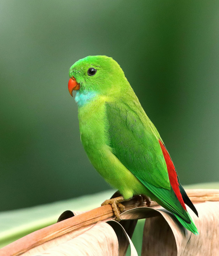

In [16]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

/tmp/ipython-input-3746220817.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


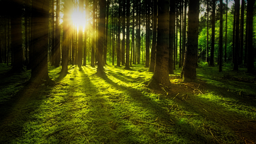

In [17]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)


In [18]:
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep
from pathlib import Path

searches = ['forest', 'bird']
path = Path('bird_or_not')

def safe_download_images(dest, query, delay=15):
    try:
        urls = search_images(query)
        download_images(dest, urls=urls)
        print(f"Downloaded: {query} to {dest}")
    except Exception as e:
        print(f"Failed to download for '{query}': {e}")
    sleep(delay)

for o in searches:
    dest = path / o
    dest.mkdir(exist_ok=True, parents=True)
    safe_download_images(dest, f'{o} photo')
    safe_download_images(dest, f'{o} sun photo')
    safe_download_images(dest, f'{o} shade photo')
    try:
        resize_images(dest, max_size=400, dest=dest)
        print(f"Resized images in {dest}")
    except Exception as e:
        print(f"Resize failed for {dest}: {e}")

/tmp/ipython-input-3746220817.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


Downloaded: forest photo to bird_or_not/forest


/tmp/ipython-input-3746220817.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


Downloaded: forest sun photo to bird_or_not/forest


/tmp/ipython-input-3746220817.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


Downloaded: forest shade photo to bird_or_not/forest


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()


Resized images in bird_or_not/forest


/tmp/ipython-input-3746220817.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


Downloaded: bird photo to bird_or_not/bird


/tmp/ipython-input-3746220817.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


Downloaded: bird sun photo to bird_or_not/bird


/tmp/ipython-input-3746220817.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


Downloaded: bird shade photo to bird_or_not/bird


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/local/lib/python3.11/dist-packages/PIL/

Resized images in bird_or_not/bird


In [19]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/local/lib/python3.11/dist-packages/fastcore/parallel.py:63: ResourceWarning: unclosed file <_io.BufferedReader name='bird_or_not/bird/dbb5215d-d00b-4ea6-a357-72814d94a09d.png'>
  return g(item)


2

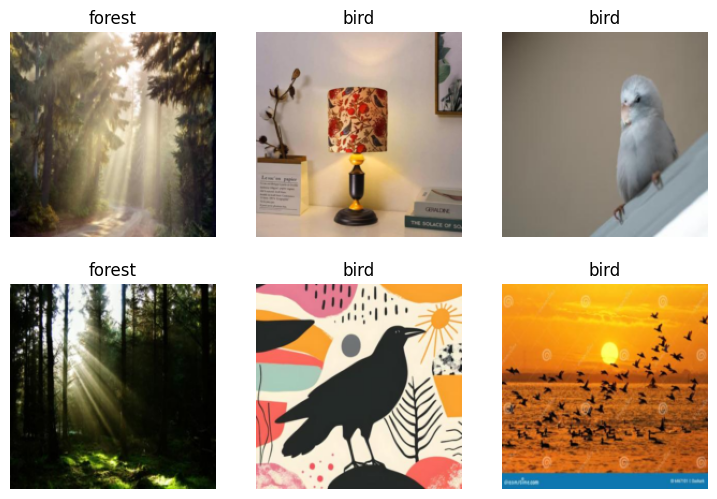

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.freeze()
learn.fit_one_cycle(1)

learn.unfreeze()
learn.fit_one_cycle(2, lr_max=1e-3)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 89.2MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.612735,0.278154,0.094170,02:30


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.So

epoch,train_loss,valid_loss,error_rate,time
0,0.308807,3.117503,0.269058,03:21
1,0.274183,0.419858,0.130045,03:17


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde455c0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x78dafde444b0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.So

In [22]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
